In [28]:
import time
import dask.bag as db
import matplotlib.pylab as plt
from functools import partial

In [29]:
timings = {}
block = 10
for i in range (1, 10) :
    print("Block size = ",  block)
    start_time = time.perf_counter()
    b = db.read_text('transcript.txt', blocksize=block)
    wordcount = b.str.split().flatten().frequencies().topk(10, lambda x: x[1])
    output = wordcount.compute()
    end_time = time.perf_counter()
    block = block * 10
    timings[i] = end_time-start_time

#What do you notice about the output?
print(output)

Block size =  10
Block size =  100
Block size =  1000
Block size =  10000
Block size =  100000
Block size =  1000000
Block size =  10000000
Block size =  100000000
Block size =  1000000000
[('and', 1553), ('to', 1390), ('the', 1326), ('of', 974), ('a', 951), ('that', 905), ('you', 733), ('in', 664), ('I', 664), ('we', 487)]


**Interpretation:** The word "I" appears in uppercase, while others are lowercase. This indicates that text normalization wasn't applied in this output. And the frequency of 

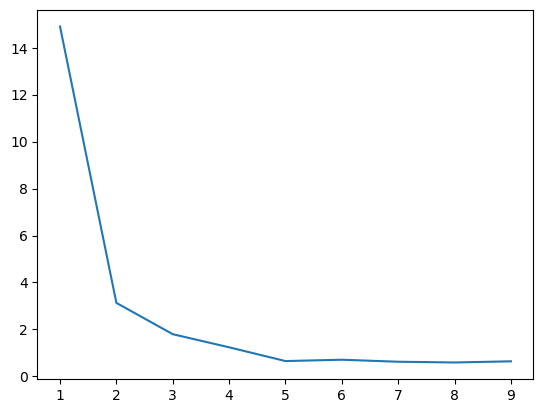

In [30]:
lists = sorted(timings.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

# When is Dask most efficient?

**Interpretation:** From the graph, as the block size increased, the execution time reduced. Usually Dask performs well when the block size is optimal. So, after a certain threshold, the execution time might increase for increased block size.

In [31]:
#Challenge - Do better.
#1. Better time
#2. Better output

block = 10
TOP_20 = 20
stopword_set = []

def filter_stopword(word, stopwords) :
    return word not in stopwords

def filter_stopwords(words, stopwords) :
    return list(filter(partial(filter_stopword, stopwords=stopwords), words))

print("Block size = ",  block)
start_time = time.perf_counter()
b = db.read_text('transcript.txt', blocksize=block)

                          ### Added a step to filter stopwords.
wordcount = b.str.split().map(partial(filter_stopwords, stopwords=stopword_set)).flatten().frequencies().topk(TOP_20, lambda x: x[1])
output = wordcount.compute()
end_time = time.perf_counter()

print(output)
print("This run took ", end_time - start_time)

Block size =  10
[('and', 1553), ('to', 1390), ('the', 1326), ('of', 974), ('a', 951), ('that', 905), ('you', 733), ('in', 664), ('I', 664), ('we', 487), ('is', 466), ('for', 449), ('have', 370), ('it', 347), ('with', 332), ('are', 326), ('so', 317), ('really', 287), ('on', 263), ('this', 254)]
This run took  21.437078999999358


In [41]:
block = 10000000
TOP_20 = 20
stopword_set = set([]) 
def filter_stopword(word, stopwords) :
    return word not in stopwords

def filter_stopwords(words, stopwords) :
    return list(filter(partial(filter_stopword, stopwords=stopwords), words))

print("Block size = ",  block)
start_time = time.perf_counter()
b = db.read_text('transcript.txt', blocksize=block).str.upper()

                          ### Added a step to filter stopwords.
wordcount = b.str.split().map(partial(filter_stopwords, stopwords=stopword_set)).flatten().frequencies().topk(TOP_20, lambda x: x[1])
output = wordcount.compute()
end_time = time.perf_counter()

print(output)
print("This run took ", end_time - start_time)

Block size =  10000000
[('AND', 1768), ('TO', 1391), ('THE', 1370), ('A', 987), ('OF', 980), ('THAT', 932), ('YOU', 834), ('IN', 679), ('I', 679), ('WE', 598), ('SO', 547), ('IS', 471), ('FOR', 454), ('IT', 417), ('HAVE', 372), ('WITH', 336), ('ARE', 330), ('REALLY', 289), ('THIS', 274), ('BUT', 266)]
This run took  0.6653373000008287


**Challenge:** To get a better output and better time, I have tried to increase the block size from 10 to 10000000, which rapidly decreased the time from 21.43s to 0.66s while converting the words to upper case, normalizes the text and the output looks more normalized in an uppercase words.